## Capstone 2: Telco Customer Churn Prediction  

**1. Data Loading Summary**
- Loaded raw data
- Performed data analysis
- Data wrangling to clean the data
- Saved the cleaned data in csv format

**2. Exploratory Data Analysis (EDA)**
- Divide the features into difference categories
- For each feature alalyze the relationship with the target feature which is 'Churn' 


In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the cleaned data

df = pd.read_csv('Excel_Files/Telco_customer_churn_cleaned.csv')
df.head()


,Unnamed: 0,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,1,0,0,1,...,1,1,1,1,0,1,0,29.85,29.85,0
1,1,1,1,0,0,0,34,1,1,1,...,2,1,1,1,1,0,1,56.95,1889.50,0
2,2,2,1,0,0,0,2,1,1,1,...,1,1,1,1,0,1,1,53.85,108.15,1
3,3,3,1,0,0,0,45,0,0,1,...,2,2,1,1,1,0,2,42.30,1840.75,0
4,4,4,0,0,0,0,2,1,1,2,...,1,1,1,1,0,1,0,70.70,151.65,1


In [4]:
# Statistics for all features

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7032.0,3515.500000,2030.107879,0.00,1757.7500,3515.500,5273.2500,7031.00
index,7032.0,3521.562144,2032.832448,0.00,1762.7500,3521.500,5282.2500,7042.00
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,1.325228,0.642585,0.00,1.0000,1.000,2.0000,2.00
InternetService,7032.0,1.224118,0.778643,0.00,1.0000,1.000,2.0000,2.00


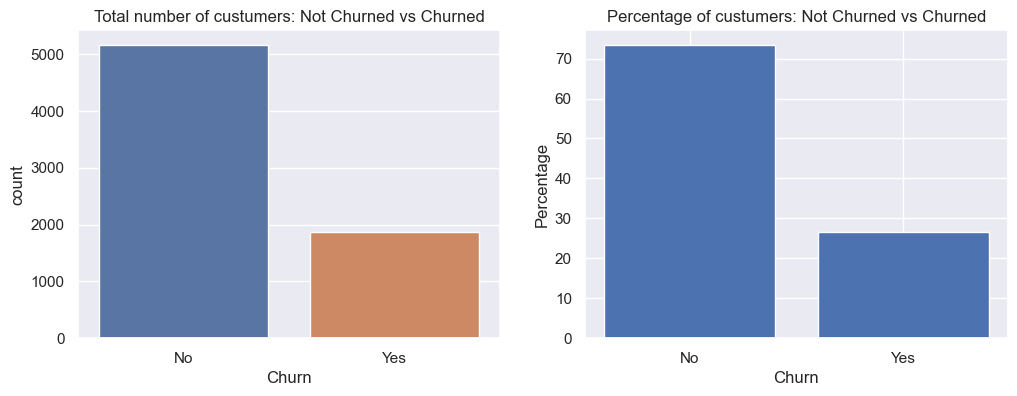

In [105]:
# Plot the total number of customers who churned and who did not churn 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

#sns.countplot(data=df, x="Churn", ax=ax[0], color=('b'))
sns.countplot(data=df, x="Churn", ax=ax[0])
ax[0].set_title("Total number of custumers: Not Churned vs Churned")
ax[0].set_xticklabels(['No','Yes'])

df1 = df['Churn'].value_counts(normalize=True)
df1 = df1.mul(100)
df2 = ['No', 'Yes']
ax[1] = plt.bar(df2,df1,color='b')
ax[1] = plt.title("Percentage of custumers: Not Churned vs Churned")
ax[1] = plt.xlabel('Churn')
ax[1] = plt.ylabel('Percentage')

plt.show()


From the plots we can see that the data is not balanced. Roughly 73% of the customers did not Churn and 27% of the customers churned. When comparing relationsip of different features with 'Churn' it maybe better to look at normalized proporations. 

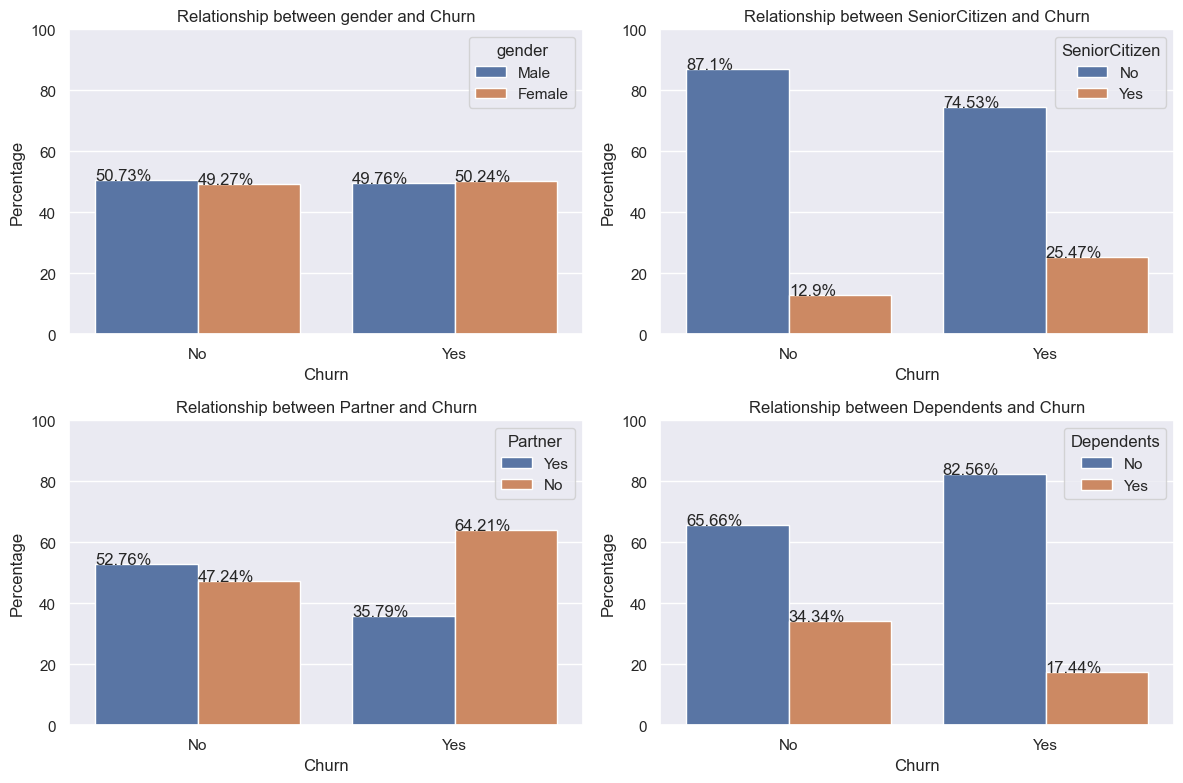

In [175]:
# There are 4 features that represent the customer demographics: gender, SeniorCitizen, Partner and Dependents
# The following code explored the relationship betwen Churn and each of these features. 

df1.drop(df1.index, inplace=True)
df2.drop(df2.index, inplace=True)

# Create new dataframe column with the labels instead of numbers
df1 = df.copy()
df1['Churn'].replace(to_replace=0, value='No', inplace=True)
df1['Churn'].replace(to_replace=1, value='Yes', inplace=True)
df1['gender'].replace(to_replace=0, value='Female', inplace=True)
df1['gender'].replace(to_replace=1, value='Male', inplace=True)
df1['SeniorCitizen'].replace(to_replace=0, value='No', inplace=True)
df1['SeniorCitizen'].replace(to_replace=1, value='Yes', inplace=True)
df1['Partner'].replace(to_replace=0, value='No', inplace=True)
df1['Partner'].replace(to_replace=1, value='Yes', inplace=True)
df1['Dependents'].replace(to_replace=0, value='No', inplace=True)
df1['Dependents'].replace(to_replace=1, value='Yes', inplace=True)

# Group by Churn and calulate percentages for each feature
df1_gender = df1.groupby("Churn")['gender'].value_counts(normalize=True).mul(100)
df1_gender = df1_gender.rename('Percentage').reset_index()
df1_SeniorCitizen = df1.groupby("Churn")['SeniorCitizen'].value_counts(normalize=True).mul(100)
df1_SeniorCitizen = df1_SeniorCitizen.rename('Percentage').reset_index()
df1_Partner = df1.groupby("Churn")['Partner'].value_counts(normalize=True).mul(100)
df1_Partner = df1_Partner.rename('Percentage').reset_index()
df1_Dependents = df1.groupby("Churn")['Dependents'].value_counts(normalize=True).mul(100)
df1_Dependents = df1_Dependents.rename('Percentage').reset_index()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

p1 = sns.barplot(x="Churn", y="Percentage", hue="gender", data=df1_gender, ax=ax[0,0])
p1.set_title("Relationship between gender and Churn")
p1.set_xlabel('Churn')
p1.set_ylabel('Percentage')
p1.set_ylim(0,100)
for i in p1.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p1.text(txt_x,txt_y,txt)

p2 = sns.barplot(x="Churn", y="Percentage", hue="SeniorCitizen", data=df1_SeniorCitizen, ax=ax[0,1])
p2.set_title("Relationship between SeniorCitizen and Churn")
p2.set_xlabel('Churn')
p2.set_ylabel('Percentage')
p2.set_ylim(0,100)
for i in p2.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p2.text(txt_x,txt_y,txt)

p3 = sns.barplot(x="Churn", y="Percentage", hue="Partner", data=df1_Partner, ax=ax[1,0])
p3.set_title("Relationship between Partner and Churn")
p3.set_xlabel('Churn')
p3.set_ylabel('Percentage')
p3.set_ylim(0,100)
for i in p3.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p3.text(txt_x,txt_y,txt)

p4 = sns.barplot(x="Churn", y="Percentage", hue="Dependents", data=df1_Dependents, ax=ax[1,1])
p4.set_title("Relationship between Dependents and Churn")
p4.set_xlabel('Churn')
p4.set_ylabel('Percentage')
p4.set_ylim(0,100)
for i in p4.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p4.text(txt_x,txt_y,txt)

fig.tight_layout()
plt.show()

Customer demographics:

- Gender: There is no clear pattern between customer's gender and churn.

- Senior Citizen: It seems like being a senior citizen increases the chances of churning. 

- Partner: Customers without a partner are more likely to churn. 

- Dependents: Most customers do not have dependents. Customers without dependents are more likely to churn. 

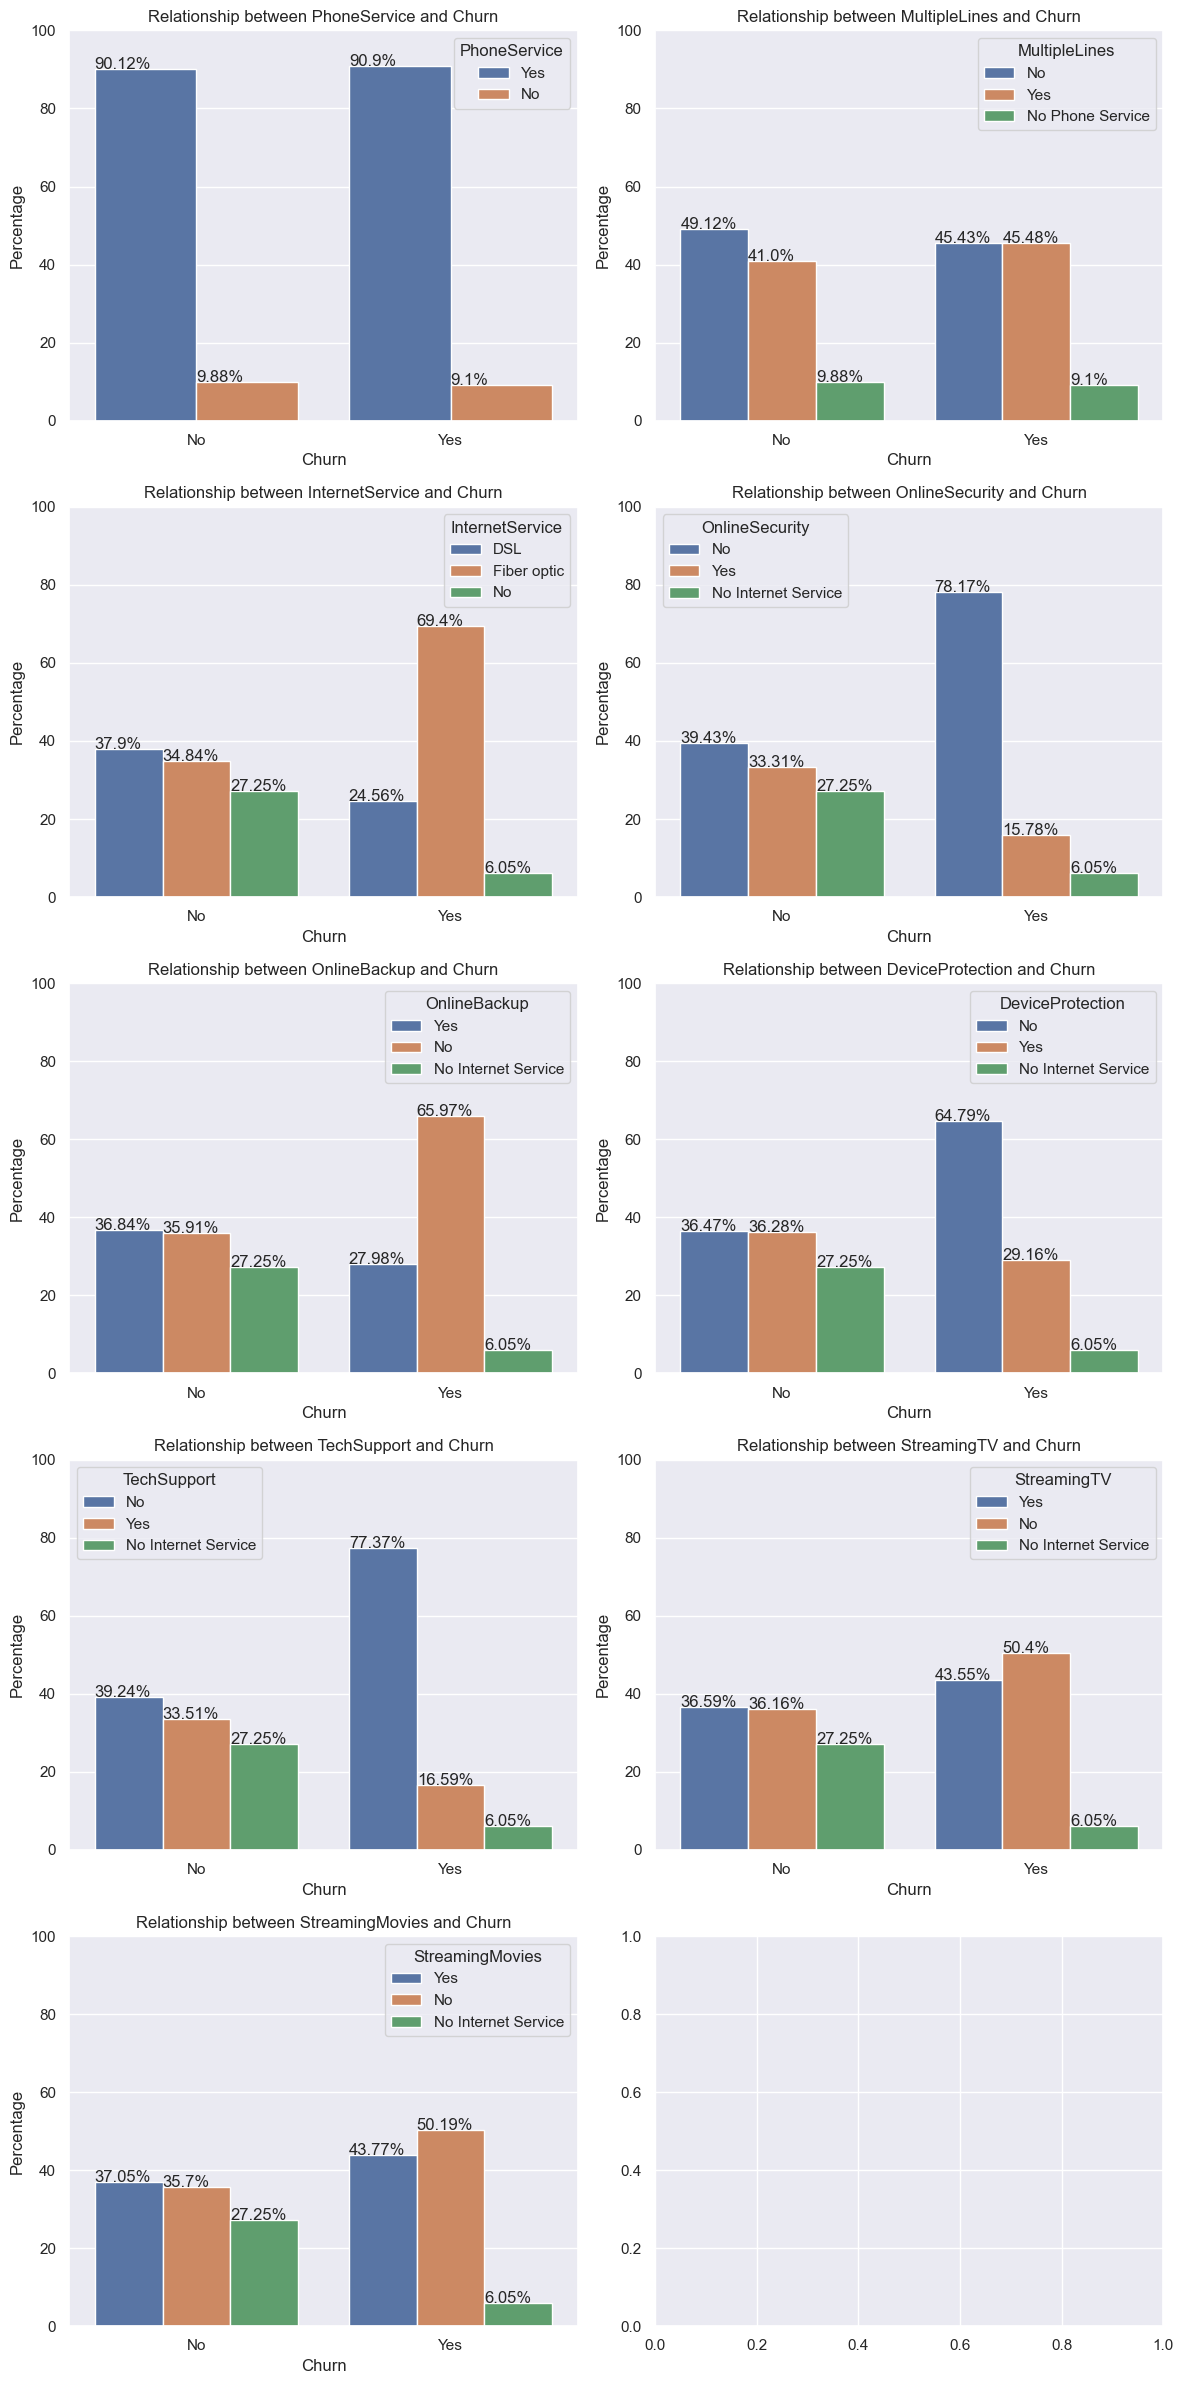

In [183]:
# There are 9 features that represent the customer services: PhoneService, MultipleLines, InternetService,
# OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
# The following code explores the relationship betwen Churn and each of these features. 

df1_gender.drop(df1_gender.index, inplace=True)
df1_SeniorCitizen.drop(df1_SeniorCitizen.index, inplace=True)
df1_Partner.drop(df1_Partner.index, inplace=True)
df1_Dependents.drop(df1_Dependents.index, inplace=True)

# Update the new dataframe column with the labels instead of numbers
df1['PhoneService'].replace(to_replace=0, value='No', inplace=True)
df1['PhoneService'].replace(to_replace=1, value='Yes', inplace=True)
df1['MultipleLines'].replace(to_replace=0, value='No Phone Service', inplace=True)
df1['MultipleLines'].replace(to_replace=1, value='No', inplace=True)
df1['MultipleLines'].replace(to_replace=2, value='Yes', inplace=True)
df1['InternetService'].replace(to_replace=0, value='No', inplace=True)
df1['InternetService'].replace(to_replace=1, value='DSL', inplace=True)
df1['InternetService'].replace(to_replace=2, value='Fiber optic', inplace=True)
df1['OnlineSecurity'].replace(to_replace=0, value='No Internet Service', inplace=True)
df1['OnlineSecurity'].replace(to_replace=1, value='No', inplace=True)
df1['OnlineSecurity'].replace(to_replace=2, value='Yes', inplace=True)
df1['OnlineBackup'].replace(to_replace=0, value='No Internet Service', inplace=True)
df1['OnlineBackup'].replace(to_replace=1, value='No', inplace=True)
df1['OnlineBackup'].replace(to_replace=2, value='Yes', inplace=True)
df1['DeviceProtection'].replace(to_replace=0, value='No Internet Service', inplace=True)
df1['DeviceProtection'].replace(to_replace=1, value='No', inplace=True)
df1['DeviceProtection'].replace(to_replace=2, value='Yes', inplace=True)
df1['TechSupport'].replace(to_replace=0, value='No Internet Service', inplace=True)
df1['TechSupport'].replace(to_replace=1, value='No', inplace=True)
df1['TechSupport'].replace(to_replace=2, value='Yes', inplace=True)
df1['StreamingTV'].replace(to_replace=0, value='No Internet Service', inplace=True)
df1['StreamingTV'].replace(to_replace=1, value='No', inplace=True)
df1['StreamingTV'].replace(to_replace=2, value='Yes', inplace=True)
df1['StreamingMovies'].replace(to_replace=0, value='No Internet Service', inplace=True)
df1['StreamingMovies'].replace(to_replace=1, value='No', inplace=True)
df1['StreamingMovies'].replace(to_replace=2, value='Yes', inplace=True)

# Group by Churn and calulate percentages for each feature
df1_PhoneService = df1.groupby("Churn")['PhoneService'].value_counts(normalize=True).mul(100)
df1_PhoneService = df1_PhoneService.rename('Percentage').reset_index()
df1_MultipleLines = df1.groupby("Churn")['MultipleLines'].value_counts(normalize=True).mul(100)
df1_MultipleLines = df1_MultipleLines.rename('Percentage').reset_index()
df1_InternetService = df1.groupby("Churn")['InternetService'].value_counts(normalize=True).mul(100)
df1_InternetService = df1_InternetService.rename('Percentage').reset_index()
df1_OnlineSecurity = df1.groupby("Churn")['OnlineSecurity'].value_counts(normalize=True).mul(100)
df1_OnlineSecurity = df1_OnlineSecurity.rename('Percentage').reset_index()
df1_OnlineBackup = df1.groupby("Churn")['OnlineBackup'].value_counts(normalize=True).mul(100)
df1_OnlineBackup = df1_OnlineBackup.rename('Percentage').reset_index()
df1_DeviceProtection = df1.groupby("Churn")['DeviceProtection'].value_counts(normalize=True).mul(100)
df1_DeviceProtection = df1_DeviceProtection.rename('Percentage').reset_index()
df1_TechSupport = df1.groupby("Churn")['TechSupport'].value_counts(normalize=True).mul(100)
df1_TechSupport = df1_TechSupport.rename('Percentage').reset_index()
df1_StreamingTV = df1.groupby("Churn")['StreamingTV'].value_counts(normalize=True).mul(100)
df1_StreamingTV = df1_StreamingTV.rename('Percentage').reset_index()
df1_StreamingMovies = df1.groupby("Churn")['StreamingMovies'].value_counts(normalize=True).mul(100)
df1_StreamingMovies = df1_StreamingMovies.rename('Percentage').reset_index()

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12,24))

p1 = sns.barplot(x="Churn", y="Percentage", hue="PhoneService", data=df1_PhoneService, ax=ax[0,0])
p1.set_title("Relationship between PhoneService and Churn")
p1.set_xlabel('Churn')
p1.set_ylabel('Percentage')
p1.set_ylim(0,100)
for i in p1.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p1.text(txt_x,txt_y,txt)

p2 = sns.barplot(x="Churn", y="Percentage", hue="MultipleLines", data=df1_MultipleLines, ax=ax[0,1])
p2.set_title("Relationship between MultipleLines and Churn")
p2.set_xlabel('Churn')
p2.set_ylabel('Percentage')
p2.set_ylim(0,100)
for i in p2.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p2.text(txt_x,txt_y,txt)

p3 = sns.barplot(x="Churn", y="Percentage", hue="InternetService", data=df1_InternetService, ax=ax[1,0])
p3.set_title("Relationship between InternetService and Churn")
p3.set_xlabel('Churn')
p3.set_ylabel('Percentage')
p3.set_ylim(0,100)
for i in p3.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p3.text(txt_x,txt_y,txt)

p4 = sns.barplot(x="Churn", y="Percentage", hue="OnlineSecurity", data=df1_OnlineSecurity, ax=ax[1,1])
p4.set_title("Relationship between OnlineSecurity and Churn")
p4.set_xlabel('Churn')
p4.set_ylabel('Percentage')
p4.set_ylim(0,100)
for i in p4.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p4.text(txt_x,txt_y,txt)

p5 = sns.barplot(x="Churn", y="Percentage", hue="OnlineBackup", data=df1_OnlineBackup, ax=ax[2,0])
p5.set_title("Relationship between OnlineBackup and Churn")
p5.set_xlabel('Churn')
p5.set_ylabel('Percentage')
p5.set_ylim(0,100)
for i in p5.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p5.text(txt_x,txt_y,txt)

p6 = sns.barplot(x="Churn", y="Percentage", hue="DeviceProtection", data=df1_DeviceProtection, ax=ax[2,1])
p6.set_title("Relationship between DeviceProtection and Churn")
p6.set_xlabel('Churn')
p6.set_ylabel('Percentage')
p6.set_ylim(0,100)
for i in p6.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p6.text(txt_x,txt_y,txt)

p7 = sns.barplot(x="Churn", y="Percentage", hue="TechSupport", data=df1_TechSupport, ax=ax[3,0])
p7.set_title("Relationship between TechSupport and Churn")
p7.set_xlabel('Churn')
p7.set_ylabel('Percentage')
p7.set_ylim(0,100)
for i in p7.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p7.text(txt_x,txt_y,txt)

p8 = sns.barplot(x="Churn", y="Percentage", hue="StreamingTV", data=df1_StreamingTV, ax=ax[3,1])
p8.set_title("Relationship between StreamingTV and Churn")
p8.set_xlabel('Churn')
p8.set_ylabel('Percentage')
p8.set_ylim(0,100)
for i in p8.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p8.text(txt_x,txt_y,txt)    

p9 = sns.barplot(x="Churn", y="Percentage", hue="StreamingMovies", data=df1_StreamingMovies, ax=ax[4,0])
p9.set_title("Relationship between StreamingMovies and Churn")
p9.set_xlabel('Churn')
p9.set_ylabel('Percentage')
p9.set_ylim(0,100)
for i in p9.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p9.text(txt_x,txt_y,txt)    
    
fig.tight_layout()
plt.show()

Customer Services:

- Phone service: Most of the customers (roughly 90%) chose phone service and this feature seems to have no apparant relationship with churn. This feature may not have much impact in predicting whether a customer would churn and can be dropped to make a prediction model simpler but this will be evaluated in the modelling stage. 

- Multiple lines: Among the customers who chose phone service, customers who did not choose mutiple lines are less likely to churn by a small percentage. 

- Internet service: Customers who chose the fiber optic are highly likely to churn. This is an indication that the fiber optic service provided by the company needs to be evaluated and compred with what the competitors have to offer. 

- Online security: Customers that did not choose online security service option are more likely to churn. Again, something to investigate for the company. Did customers with out online security have poor performance issues or spam threats etc?  

- Online backup: This feature shows a similar distribution as for 'Online security'. Again, customers with no online backup option are more likely to churn. It maybe interseting to see if these two features are related. Correlation heatmap generated later can be used to verify if the above mentioned assumption is true. 

- Device protection and Tech support: Both these features show a similar relationship with churn as 'Online security' and 'Online backup'. Customer who chose no as more likely to Churn. Later we will see if there is any correlation among these 4 features. 

- Streaming TV and Streaming movies: Customers who chose no for these services are slightly more likely to churn but the relationship is not as strong as with the previous 4 services. These two streaming related services show a similar distribution and their correlation will the checked later. 

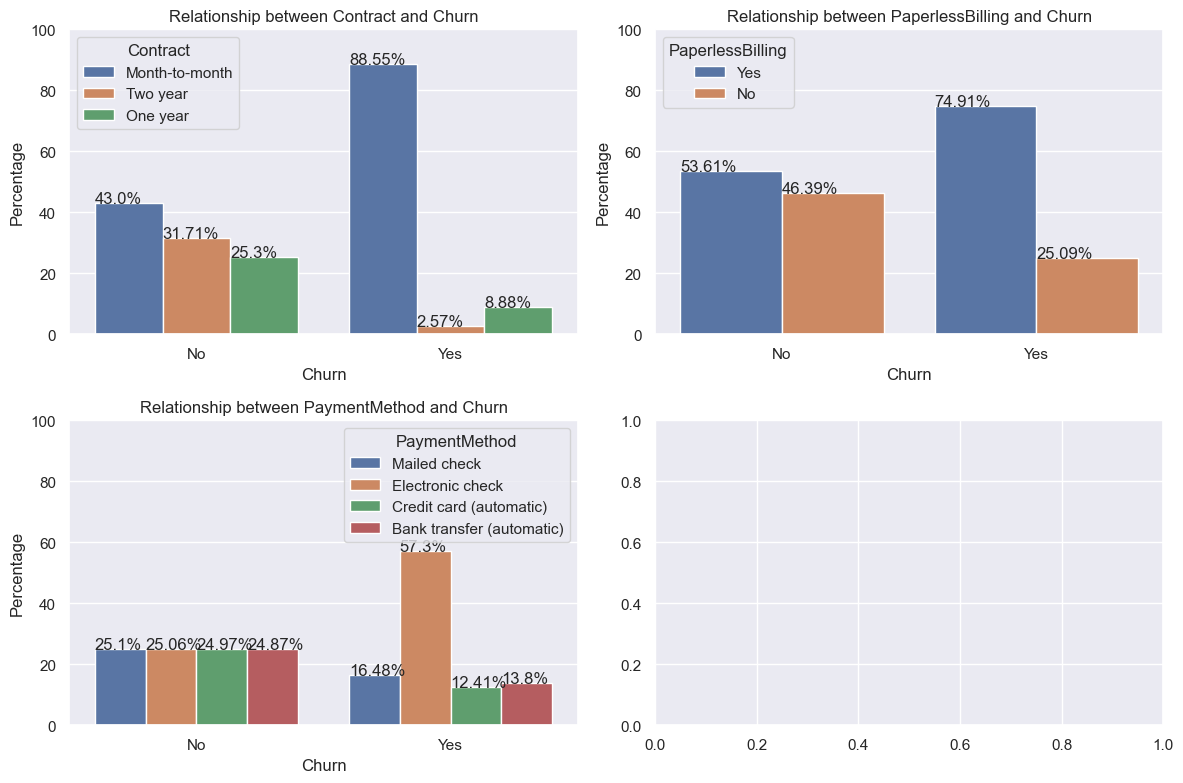

In [186]:
# There are 3 features that represent the customer payment information: Contract, PaperlessBilling and PaymentMethod
# The following code explores the relationship betwen Churn and each of these features. 

df1_PhoneService.drop(df1_PhoneService.index, inplace=True)
df1_MultipleLines.drop(df1_MultipleLines.index, inplace=True)
df1_InternetService.drop(df1_InternetService.index, inplace=True)
df1_OnlineSecurity.drop(df1_OnlineSecurity.index, inplace=True)
df1_OnlineBackup.drop(df1_OnlineBackup.index, inplace=True)
df1_DeviceProtection.drop(df1_DeviceProtection.index, inplace=True)
df1_TechSupport.drop(df1_TechSupport.index, inplace=True)
df1_StreamingTV.drop(df1_StreamingTV.index, inplace=True)
df1_StreamingMovies.drop(df1_StreamingMovies.index, inplace=True)

# Create new dataframe column with the labels instead of numbers
df1['Contract'].replace(to_replace=0, value='Month-to-month', inplace=True)
df1['Contract'].replace(to_replace=1, value='One year', inplace=True)
df1['Contract'].replace(to_replace=2, value='Two year', inplace=True)
df1['PaperlessBilling'].replace(to_replace=0, value='No', inplace=True)
df1['PaperlessBilling'].replace(to_replace=1, value='Yes', inplace=True)
df1['PaymentMethod'].replace(to_replace=0, value='Electronic check', inplace=True)
df1['PaymentMethod'].replace(to_replace=1, value='Mailed check', inplace=True)
df1['PaymentMethod'].replace(to_replace=2, value='Bank transfer (automatic)', inplace=True)
df1['PaymentMethod'].replace(to_replace=3, value='Credit card (automatic)', inplace=True)

# Group by Churn and calulate percentages for each feature
df1_Contract = df1.groupby("Churn")['Contract'].value_counts(normalize=True).mul(100)
df1_Contract = df1_Contract.rename('Percentage').reset_index()
df1_PaperlessBilling = df1.groupby("Churn")['PaperlessBilling'].value_counts(normalize=True).mul(100)
df1_PaperlessBilling = df1_PaperlessBilling.rename('Percentage').reset_index()
df1_PaymentMethod = df1.groupby("Churn")['PaymentMethod'].value_counts(normalize=True).mul(100)
df1_PaymentMethod = df1_PaymentMethod.rename('Percentage').reset_index()


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

p1 = sns.barplot(x="Churn", y="Percentage", hue="Contract", data=df1_Contract, ax=ax[0,0])
p1.set_title("Relationship between Contract and Churn")
p1.set_xlabel('Churn')
p1.set_ylabel('Percentage')
p1.set_ylim(0,100)
for i in p1.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p1.text(txt_x,txt_y,txt)

p2 = sns.barplot(x="Churn", y="Percentage", hue="PaperlessBilling", data=df1_PaperlessBilling, ax=ax[0,1])
p2.set_title("Relationship between PaperlessBilling and Churn")
p2.set_xlabel('Churn')
p2.set_ylabel('Percentage')
p2.set_ylim(0,100)
for i in p2.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p2.text(txt_x,txt_y,txt)

p3 = sns.barplot(x="Churn", y="Percentage", hue="PaymentMethod", data=df1_PaymentMethod, ax=ax[1,0])
p3.set_title("Relationship between PaymentMethod and Churn")
p3.set_xlabel('Churn')
p3.set_ylabel('Percentage')
p3.set_ylim(0,100)
for i in p3.patches:
    txt = str(i.get_height().round(2)) + '%'
    txt_x = i.get_x() 
    txt_y = i.get_height()
    p3.text(txt_x,txt_y,txt)

fig.tight_layout()
plt.show()

Customer payment information:

- Contract: Customers who were on month-to-month were more likely to churn than the ones in longer 1 year or 2 year contracts. This is probably as expected. 

- Paperless billing: Customers who chose paperless billing option were more likely to churn. This does not make sense and maybe we can check if this feature has a strong correlation with any other feature that can explain this relationship with churn. 

- Payment method: Customers who chose electronic check option are also highly likely to churn compared to other payment types. Maybe e-check service has some processing issues/delays. Needs to be investigated. 

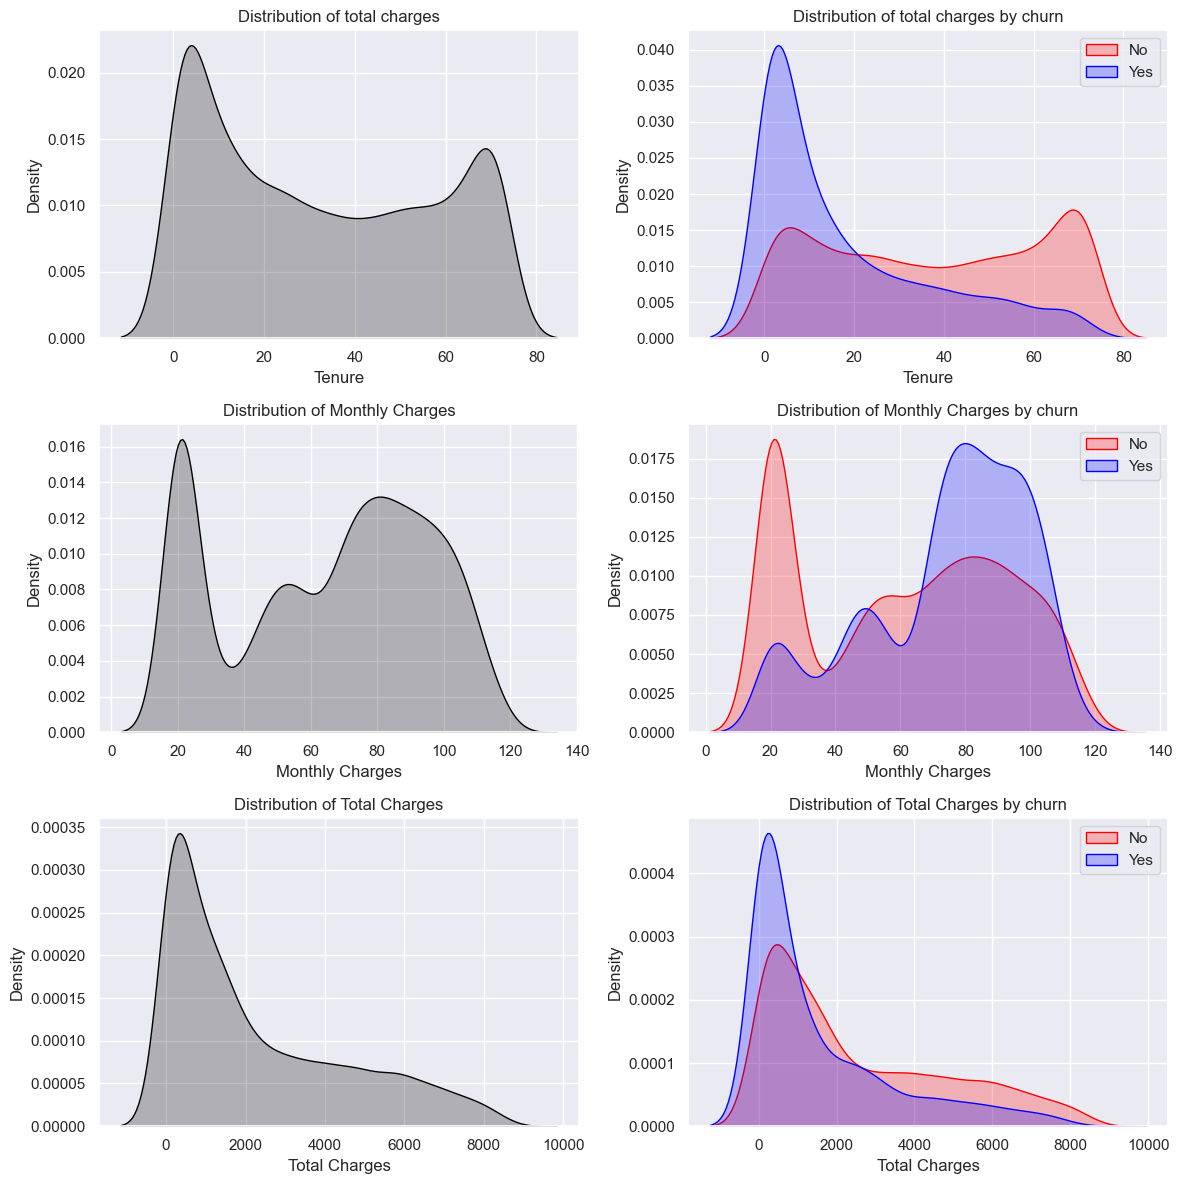

In [195]:
## There are 3 numerical features that represent the customer billing information: tenure, MonthlyCharges and TotalCharges
# The following code shows the distribution of the three features and also their relationship with Churn. 

df1_Contract.drop(df1_Contract.index, inplace=True)
df1_PaperlessBilling.drop(df1_PaperlessBilling.index, inplace=True)
df1_PaymentMethod.drop(df1_PaymentMethod.index, inplace=True)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

p1 = sns.kdeplot(df1.tenure, color="Black", fill=True, ax=ax[0,0])
p1.set_ylabel('Density')
p1.set_xlabel('Tenure')
p1.set_title('Distribution of total charges')

p2 = sns.kdeplot(df1.tenure[(df1["Churn"] == 'No')], color="Red", fill=True, ax=ax[0,1])
p3 = sns.kdeplot(df1.tenure[(df1["Churn"] == 'Yes')], color="Blue", fill= True, ax=ax[0,1])
p2.legend(["No","Yes"],loc='upper right')
p2.set_ylabel('Density')
p2.set_xlabel('Tenure')
p2.set_title('Distribution of total charges by churn')

p4 = sns.kdeplot(df1.MonthlyCharges, color="Black", fill=True, ax=ax[1,0])
p4.set_ylabel('Density')
p4.set_xlabel('Monthly Charges')
p4.set_title('Distribution of Monthly Charges')

p5 = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 'No')], color="Red", fill=True, ax=ax[1,1])
p6 = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 'Yes')], color="Blue", fill= True, ax=ax[1,1])
p5.legend(["No","Yes"],loc='upper right')
p5.set_ylabel('Density')
p5.set_xlabel('Monthly Charges')
p5.set_title('Distribution of Monthly Charges by churn')

p7 = sns.kdeplot(df1.TotalCharges, color="Black", fill=True, ax=ax[2,0])
p7.set_ylabel('Density')
p7.set_xlabel('Total Charges')
p7.set_title('Distribution of Total Charges')

p8 = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 'No')], color="Red", fill=True, ax=ax[2,1])
p9 = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 'Yes')], color="Blue", fill= True, ax=ax[2,1])
p8.legend(["No","Yes"],loc='upper right')
p8.set_ylabel('Density')
p8.set_xlabel('Total Charges')
p8.set_title('Distribution of Total Charges by churn')

fig.tight_layout()
plt.show()

Billing information:

- Tenure: For all the data this feature shows a bimodal distribution with 2 peaks (at around 3 and 70). Seprating the customers by churn and looking at the distributions explains the 2 peaks. Customers who churned stayed for a short period and customers who did not churn stayed longer with the company. 

- Monthly charges: For all data the distribution was again bimodal with two peaks at around 20 and 80. By plotting for customers based on churn we can see that customers who churned on an average pai much higher than the customers who did not churn. High costs of service seems to be a strong reason behind customers to churn. 

- Total charges: We can that the distribution is not normal and more like chi-square with a long tail. It is not clear if the total charges has a strong relationship with churn. 

Text(0.5, 1.0, 'Correlation heatmap of all the features')

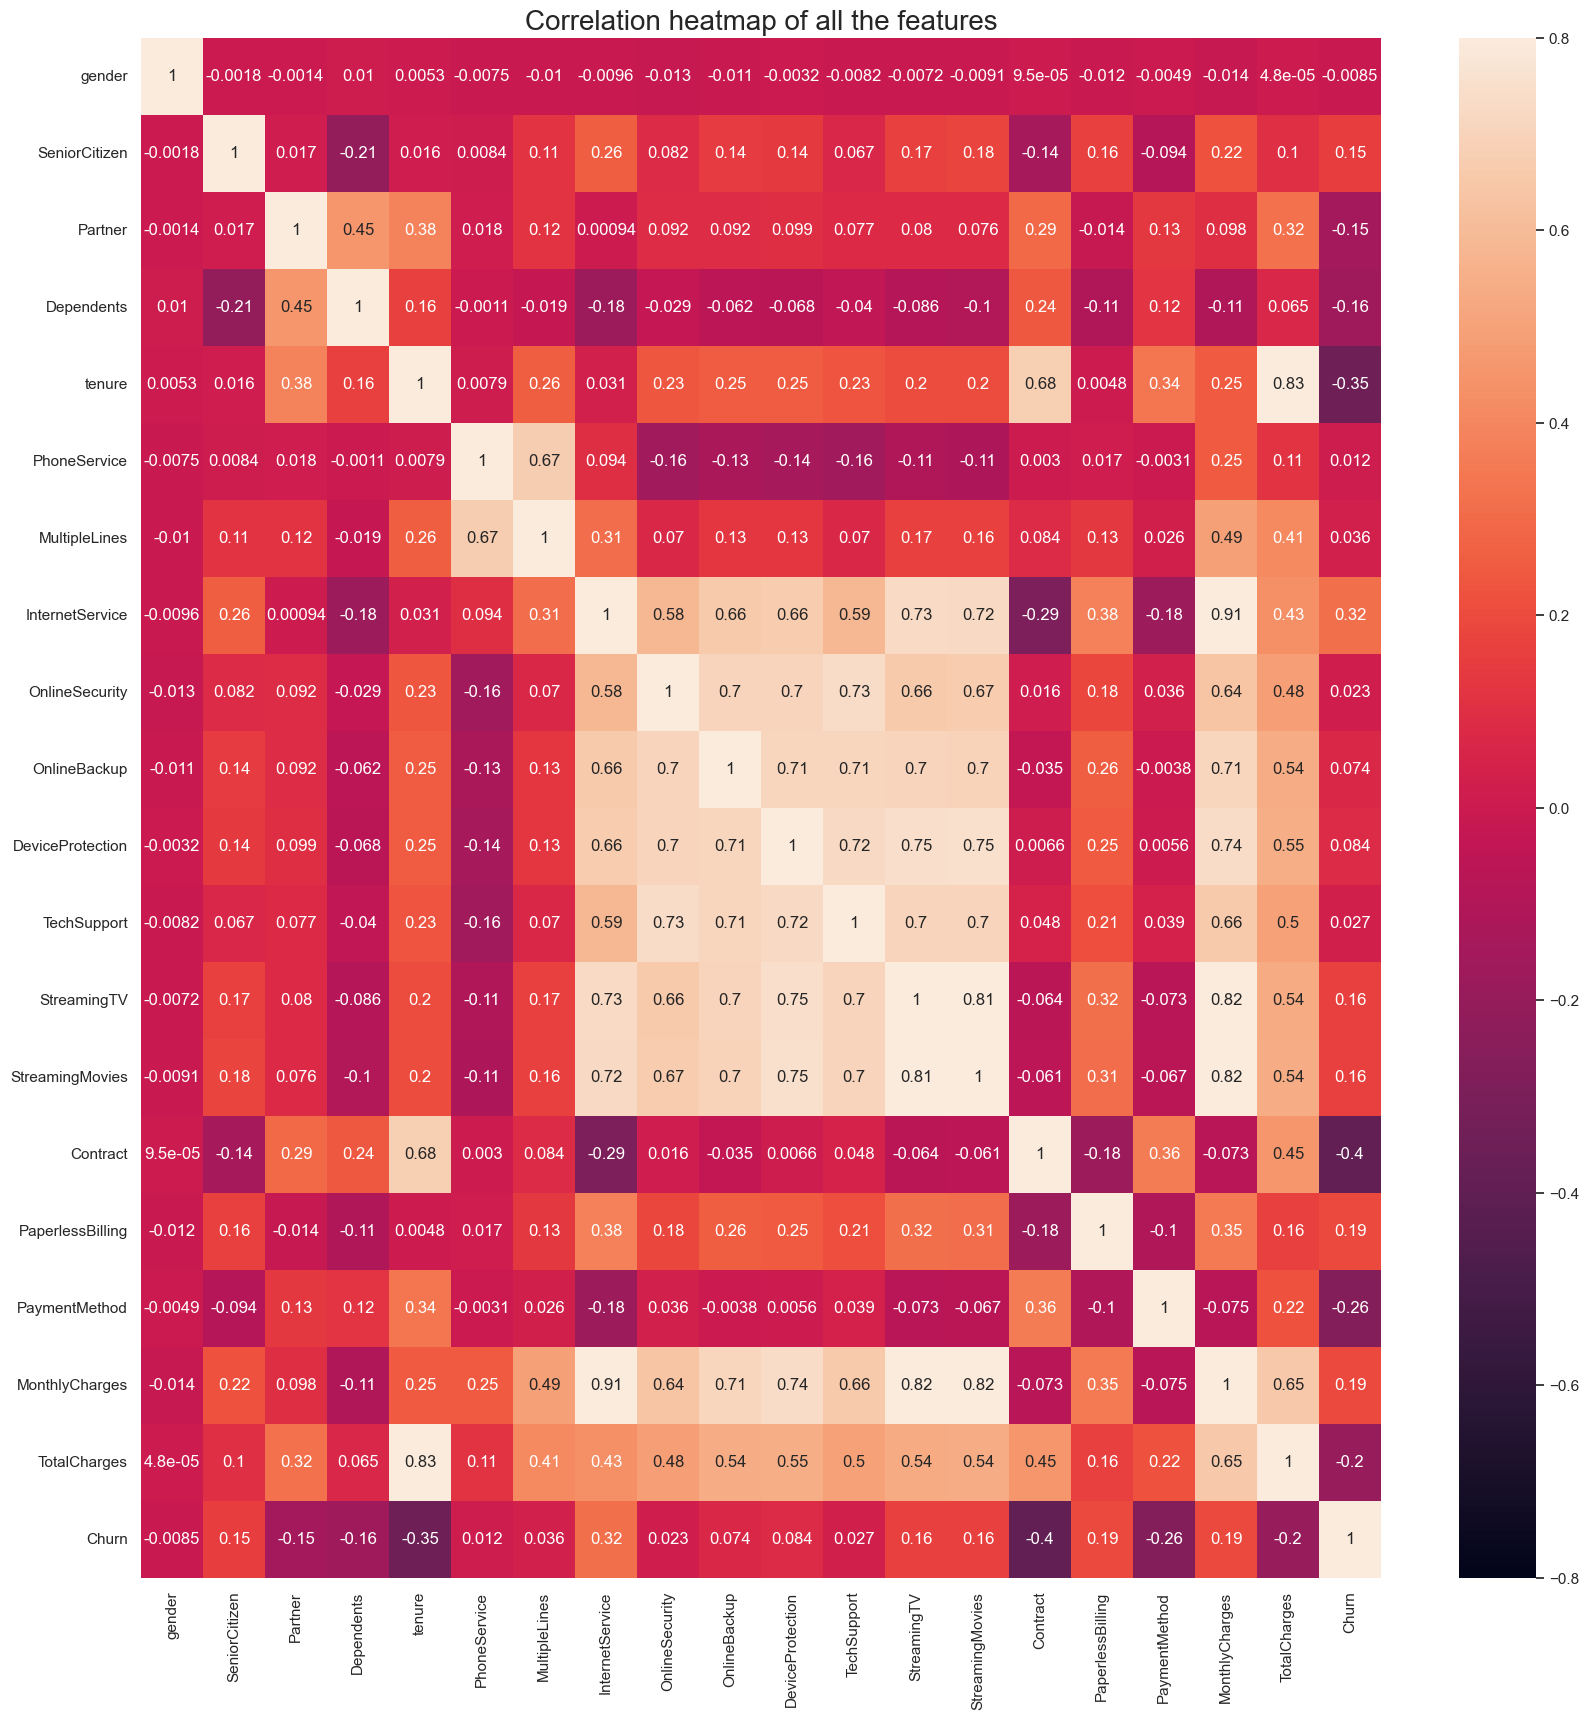

In [215]:
# Generate the correlation heatmap

df2 = df.copy()
df2.drop(columns=['Unnamed: 0', 'index'],  inplace=True)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (20,20))
ax = sns.heatmap(df2.corr(), vmin=-0.8, vmax=0.8, annot = True);
ax.set_title('Correlation heatmap of all the features', fontdict={'fontsize':20})
#heatmap.set_title('Correlation Heatmap',

Correlation heatmap:
Looking at the correlation heatmap, let us use a threshold of >0.6 and <-0.6 to select features that have strong correlation. 

- Tenure and contract: 0.68
- Tenure and total cahrges: 0.83
Tenure and contract are correlated which is expected. Customers choosing month-to-month have likely shorter tenure compared to customers who are on yearly contract. Total charges likely is a function on monthly charges and tenure, so it is expected to have a strong correlation cofficient. 

- Phone service and Multiple Lines: 0.67
Phone service is likely is redundant feature. Customers who did not choose phone service couldnt have chosen any other features such as multiple lines, online backup etc. 

- Internet service, Online security, Online backup, Device protection, Tech support, Streaming TV and Streaming movies: coorelation higher than 0.58
From the plots shown earlier we suspected there could be strong correlation between the service features and the correlation heatmap confirms the suspicion. It seems like the same customers opted for similar kind of services. 

- Monthly charges vs Different services: correlation > 0.64
Monthly charges depends on number of servies chosen and hence we see a strong correlation for the servces and monthly charges. 

- Partner and dependents: correlation = 0.45
Customers with partners more likely to have dependents (children). Interesting correlation between the two features. 


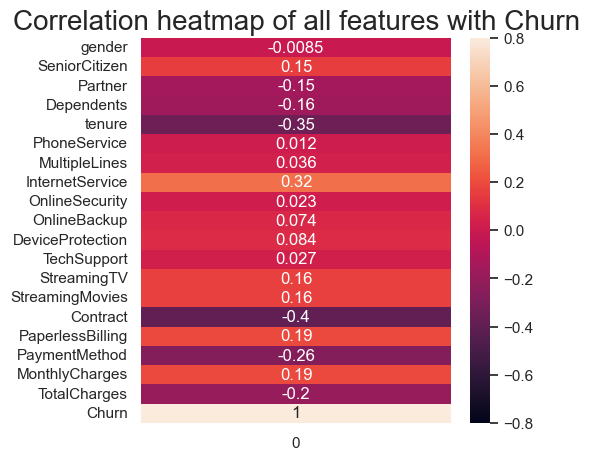

In [223]:
# Correlation of other features with Churn

churn_column = df2['Churn']
correlation_df = df2.corrwith(churn_column)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
p = sns.heatmap(correlation_df.to_frame(), vmin=-0.8, vmax=0.8, annot=True, ax=ax)
p.set_title('Correlation heatmap of all features with Churn', fontdict={'fontsize': 20})

plt.show()

This plot shows the correlation of all features with churn. 